In [1]:
import sklearn
import requests
import pandas as pd
import os
from os.path import join, basename
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

# Download df

In [2]:
"""
>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
"""

# Download Census-Income (KDD) df Set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', \
    'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']


In [3]:
# Open
df = pd.read_csv('adult.data')



df.columns = columns
df_columns = [x for x in df.columns if x != 'label']
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  label           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# df Exploration

#### Check for NaN values

In [5]:
# Check for NaN 
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

#### Categorical Columns -> Numerical

In [6]:
# Put all object type columns into numerica
from sklearn.preprocessing import LabelEncoder

# Transform df
categorical_columns = [x for x in df.columns if df[x].dtype == 'object']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32560 non-null  int64
 1   workclass       32560 non-null  int64
 2   fnlwgt          32560 non-null  int64
 3   education       32560 non-null  int64
 4   education-num   32560 non-null  int64
 5   marital-status  32560 non-null  int64
 6   occupation      32560 non-null  int64
 7   relationship    32560 non-null  int64
 8   race            32560 non-null  int64
 9   sex             32560 non-null  int64
 10  capital-gain    32560 non-null  int64
 11  capital-loss    32560 non-null  int64
 12  hours-per-week  32560 non-null  int64
 13  native-country  32560 non-null  int64
 14  label           32560 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


#### Plot

0it [00:00, ?it/s]

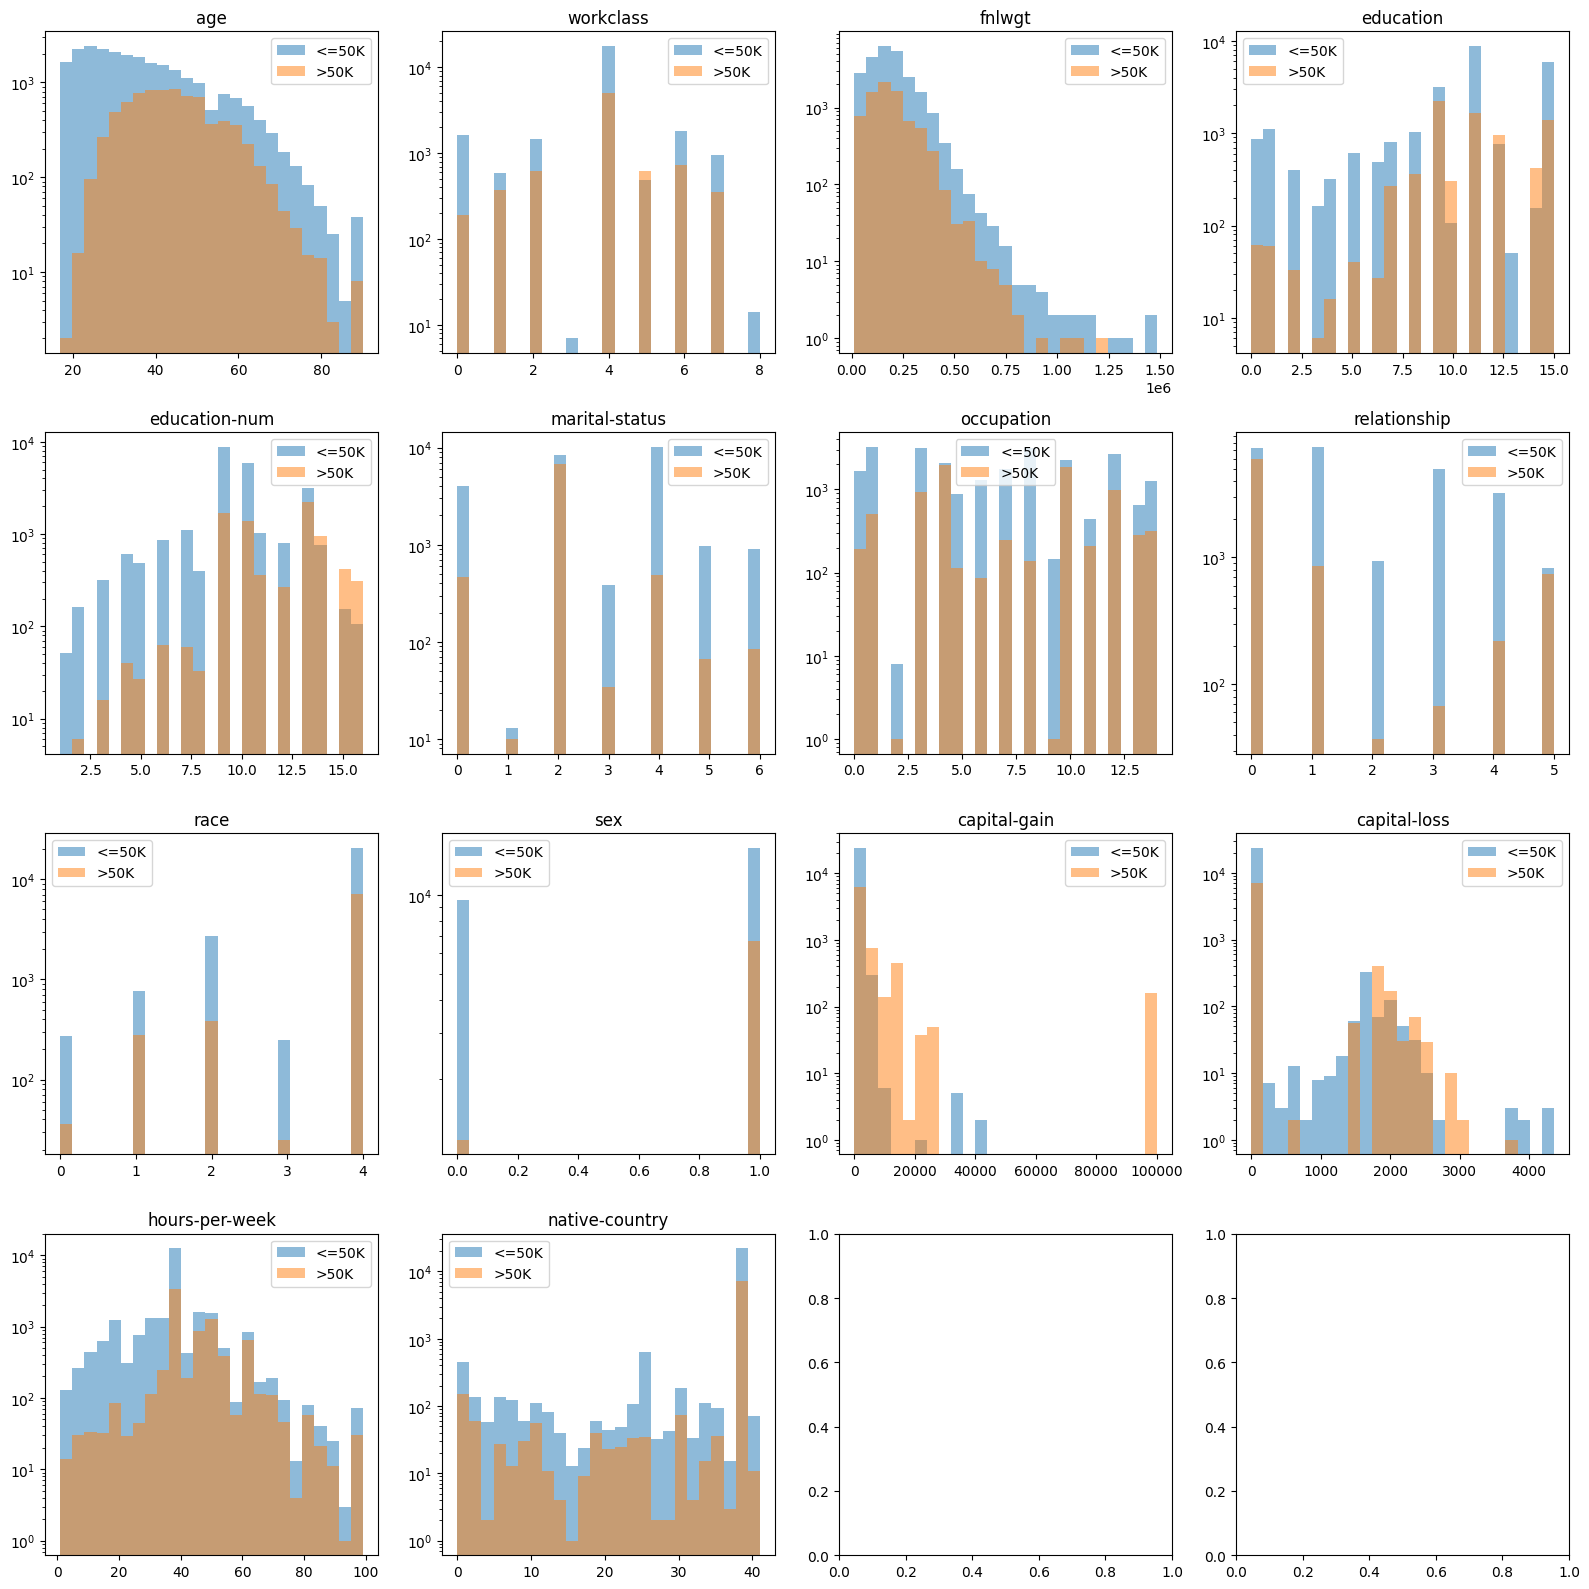

In [8]:
# Plot histogram for each feature
num_cols = 4
num_rows = int(np.ceil((df.shape[1] - 1) / num_cols))
fig, ax = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
for i, column in tqdm(enumerate(df_columns)):
    row, col = int(i/num_cols), i%num_cols
    # Define histogram range
    hist_range = (df[column].min(), df[column].max())


    ax[row, col].set_title(column)
    ax[row, col].set_yscale('log')
    
    ax[row, col].hist(df[df['label'] == 0][column], bins=25, range=hist_range, alpha=0.5, label='<=50K')
    ax[row, col].hist(df[df['label'] ==1][column], bins=25, range=hist_range, alpha=0.5, label='>50K')
    
    ax[row, col].autoscale(enable=True) 
    ax[row, col].legend()

plt.tight_layout()

#### Standardize df

In [9]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


Since mean != 0 and std != 1 on all features, it's necessary to standardize the data.

In [10]:
df[df_columns] = (df[df_columns] - df[df_columns].mean()) / df[df_columns].std()
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
count,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,3.256000e+04,32560.000000
mean,1.929115e-16,-1.034390e-16,-7.757922e-17,-1.817820e-16,5.259238e-17,-2.836934e-17,6.121230e-17,4.222666e-17,6.459479e-17,-5.204682e-17,1.309354e-17,4.255400e-17,2.592521e-16,2.470314e-16,0.240817
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.427586
min,-1.582157e+00,-2.657362e+00,-1.681641e+00,-2.660829e+00,-3.529583e+00,-1.733999e+00,-1.554317e+00,-9.001628e-01,-4.318775e+00,-1.422276e+00,-1.459115e-01,-2.166597e-01,-3.193933e+00,-4.693163e+00,0.000000
25%,-7.757431e-01,9.012010e-02,-6.816720e-01,-3.354375e-01,-4.200202e-01,-4.061767e-01,-8.448978e-01,-9.001628e-01,3.936685e-01,-1.422276e+00,-1.459115e-01,-2.166597e-01,-3.542945e-02,2.915690e-01,0.000000
50%,-1.159501e-01,9.012010e-02,-1.081842e-01,1.813161e-01,-3.132483e-02,-4.061767e-01,1.009950e-01,-2.778054e-01,3.936685e-01,7.030767e-01,-1.459115e-01,-2.166597e-01,-3.542945e-02,2.915690e-01,0.000000
75%,6.904636e-01,9.012010e-02,4.478711e-01,4.396929e-01,7.460659e-01,9.216460e-01,8.104146e-01,9.669095e-01,3.936685e-01,7.030767e-01,-1.459115e-01,-2.166597e-01,3.695070e-01,2.915690e-01,0.000000
max,3.769498e+00,2.837602e+00,1.226837e+01,1.214823e+00,2.300847e+00,2.249469e+00,1.756307e+00,2.211624e+00,3.936685e-01,7.030767e-01,1.339418e+01,1.059318e+01,4.742820e+00,5.471962e-01,1.000000


And now mean = 0 and std = 1

### Dataset Split

In [11]:
# Split dfset
from sklearn.model_selection import train_test_split

X = df[df_columns]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

In [12]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Tentei usar estas coisas mas estas só são boas para HP-Tuning dentro de um modelo e não entre varios modelos
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import make_pipeline

for model in [LogisticRegression, RandomForestClassifier, SVC]:
    print(model.__name__)
    clf = model()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))
    print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred)))
    print()

LogisticRegression
Accuracy: 0.82
Precision: 0.70
Recall: 0.46
F1: 0.56
ROC AUC: 0.70

RandomForestClassifier
Accuracy: 0.86
Precision: 0.74
Recall: 0.64
F1: 0.68
ROC AUC: 0.78

SVC
Accuracy: 0.84
Precision: 0.74
Recall: 0.55
F1: 0.63
ROC AUC: 0.75



### Label imbalance

In [13]:
(df['label'] == 1).sum() / df.shape[0], (df['label'] == 0).sum() / df.shape[0]

(0.24081695331695332, 0.7591830466830467)

Imbalance exists!
This means that each class is not equally represented in the dataset. This can be a problem for the model, since it will be biased towards the majority class. To solve this, we can use the class_weight parameter in the model.

In [14]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([0.65754531, 2.08684506])

In [15]:
# Train the same models but add class_weight='balanced' to the model
for model in [LogisticRegression, RandomForestClassifier, SVC]:
    print(model.__name__)
    clf = model()
    clf.fit(X_train, y_train, sample_weight=[class_weights[i] for i in y_train])
    y_pred = clf.predict(X_test)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))
    print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred)))
    print()

LogisticRegression
Accuracy: 0.77
Precision: 0.52
Recall: 0.77
F1: 0.62
ROC AUC: 0.77

RandomForestClassifier
Accuracy: 0.85
Precision: 0.74
Recall: 0.62
F1: 0.67
ROC AUC: 0.77

SVC
Accuracy: 0.79
Precision: 0.55
Recall: 0.86
F1: 0.67
ROC AUC: 0.82



And we improve our AUC score from 0.78 (RandomTreeClassifier on the previous case) to 0.82 on the SVC!